# Result Overview

In this notebook, we create plots comparing the performance across the models.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import torch

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

import data_support as sup
import scp.plots as pl
from scp.utils import *
import os

np.random.seed(0)

First some functions for plotting.

In [2]:
def bar_comparison(model_names, model_scores, y_label, title=None, ax=None, colors=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 3))
    
    mask = np.isnan(model_scores)
    
    if colors is None:
        colors = ["blue"] * len(model_scores)

    colors = np.array(colors)
    cols = colors[~mask]

    model_names = np.array(model_names)[~mask]
    model_scores = np.array(model_scores)[~mask]

    ax.bar(model_names, model_scores, color=cols, edgecolor="black", linewidth=1.5)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.set_ylabel(y_label)

    if title is not None:
        ax.set_title(title)
    
    ax.grid(True)
    ax.set_axisbelow(True)


def extract_scores(results, metric):
    return [model_results[metric] if metric in model_results else np.nan for model_results in results.values()]

Define which models to load.

In [19]:
models = ["downshifted normal local", "knn", "protDP", "protvi baseline", "protvi conjunction", "protvi selection", "protvi hybrid"]
colors = ["blue", "green", "red", "orange", "orange", "orange", "orange"]

assert len(models) == len(colors)

Let's combine the results from the different models into one dict.

In [20]:
results = { model_name : sup.load_dict_from_results(f"{model_name}.pkl") for model_name in models }

In [21]:
#results

Let's create the plots.

## Combined plots

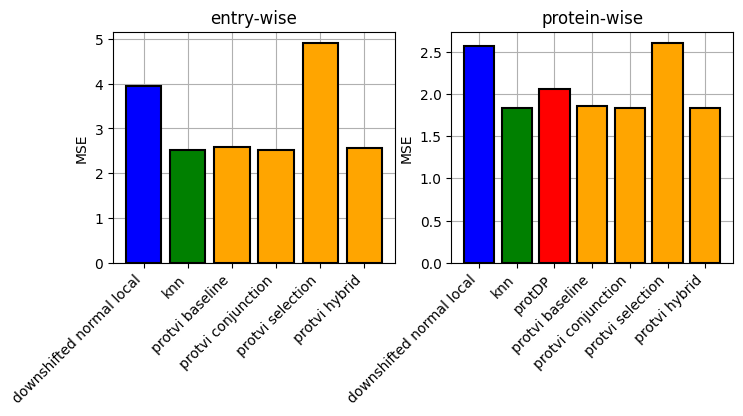

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

score = extract_scores(results, "pilot_model_mse")
bar_comparison(models, score, "MSE", "entry-wise",colors=colors, ax=axes[0])

score = extract_scores(results, "pilot_model_protein_mse")
bar_comparison(models, score, "MSE", "protein-wise", colors=colors, ax=axes[1])

# save as svg
#fig.savefig("figures/manns_pilot_model_comparison.svg", bbox_inches="tight")

## Entry-wise plots

### MSE

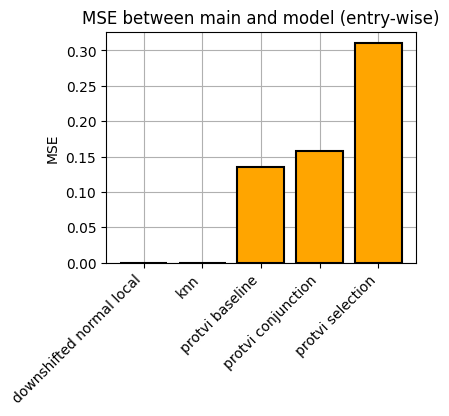

In [6]:
score = extract_scores(results, "main_model_mse")
bar_comparison(models, score, "MSE", "MSE between main and model (entry-wise)", colors=colors)

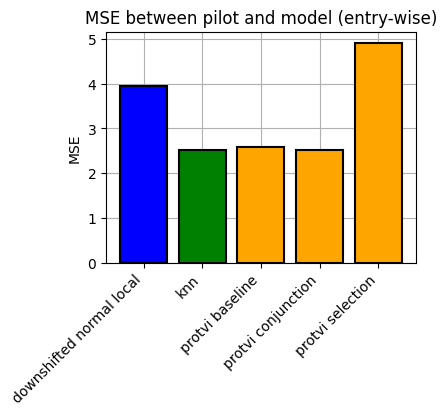

In [7]:
score = extract_scores(results, "pilot_model_mse")
bar_comparison(models, score, "MSE", "MSE between pilot and model (entry-wise)",colors=colors)

### Pearson correlation

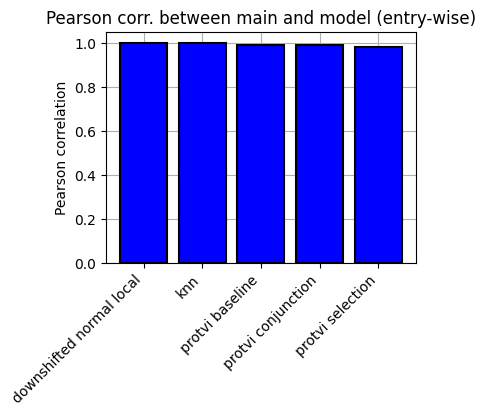

In [8]:
score = extract_scores(results, "main_model_pearson")
bar_comparison(models, score, "Pearson correlation", "Pearson corr. between main and model (entry-wise)")

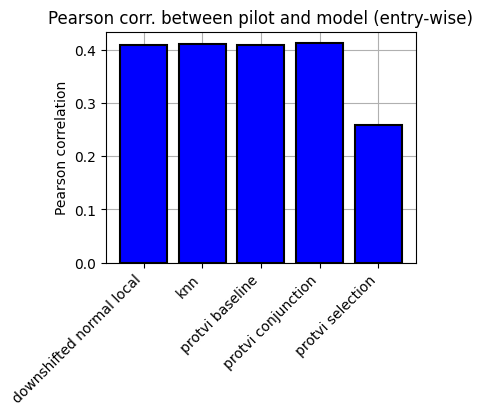

In [9]:
score = extract_scores(results, "pilot_model_pearson")
bar_comparison(models, score, "Pearson correlation", "Pearson corr. between pilot and model (entry-wise)")

## Protein-wise plots

### MSE

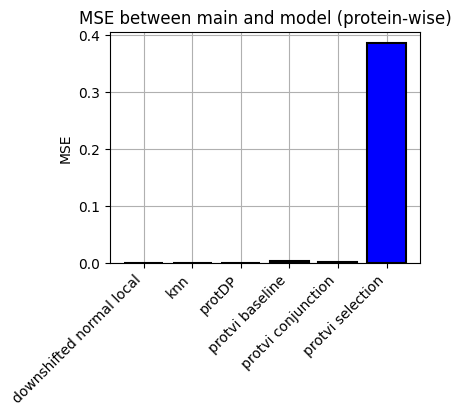

In [10]:
score = extract_scores(results, "main_model_protein_mse")
bar_comparison(models, score, "MSE", "MSE between main and model (protein-wise)")

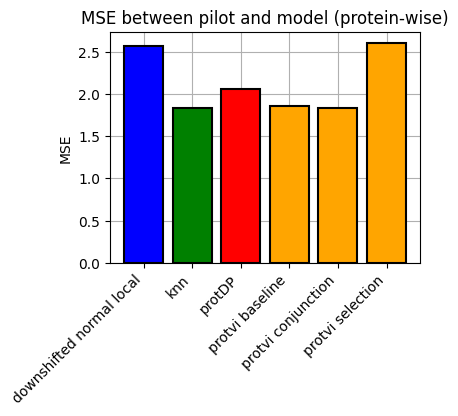

In [11]:
score = extract_scores(results, "pilot_model_protein_mse")
bar_comparison(models, score, "MSE", "MSE between pilot and model (protein-wise)", colors=colors)

### Pearson correlation

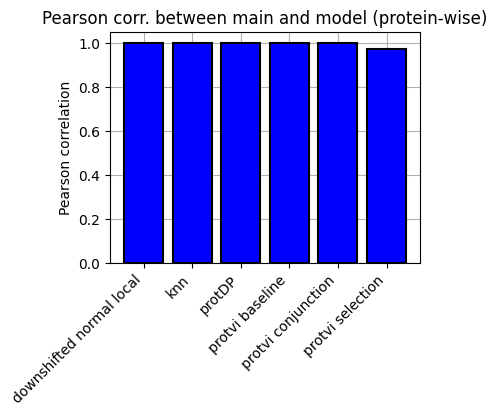

In [12]:
score = extract_scores(results, "main_model_protein_pearson")
bar_comparison(models, score, "Pearson correlation", "Pearson corr. between main and model (protein-wise)")

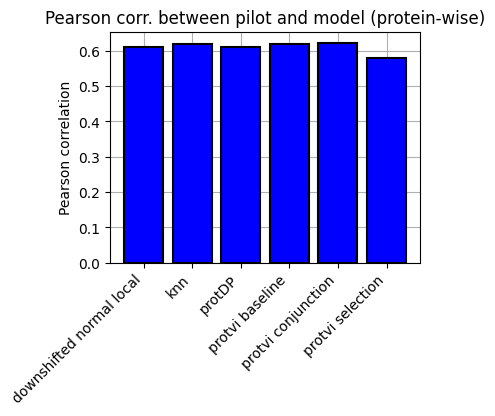

In [13]:
score = extract_scores(results, "pilot_model_protein_pearson")
bar_comparison(models, score, "Pearson correlation", "Pearson corr. between pilot and model (protein-wise)")